![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)
# Integración Numérica - Primera parte
**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*

## Fórmulas de Cuadratura

$$ \int_a^b f(x) \approx Q_n = \sum_0^n c_i . f(x_i)$$

Una fórmula de cuadratura responde a una expresión numérica que tiene por objetivo de aproximar la integral definida de una función $f(x)$ a partir de una sumatoria para la que utilizamos el valor de $f(x)$ en una serie de puntos $x_0, x_1, ... x_n$ y un coeficiente $c_i$ para cada uno de esos puntos.

De acuerdo a esa expresión, para definir una fórmula de cuadratura de $(n+1)$ puntos necesitamos conocer $(2.n +2)$ valores $(x_i, c_i)$, lo cual significa que deberíamos contar con $(2.n+2)$ ecuaciones no lineales, o bien plantear algún tipo de simplificación (por ejemplo, fijar de manera arbitraria los $x_i$) para (a la vez) reducir la cantidad de incógnitas y ecuaciones necesarias, logrando además que estas últimas sean lineales en lugar de no lineales. 

A continuación presentaremos las fórmulas cuadratura de Newton-Cotes.

### Fórmulas de Newton-Cotes

Las fórmulas de Newton-Cotes se pueden obtener utilizando la expresión general de las Fórmulas de Cuadratura pero considerando solamente a los valores de $c_i$ como incógnitas, ya que adoptan los que $x_i$ se distribuyen de manera equidistante en $[a,b]$.

Para su formulación se considera una aproximación a la función $f(x)$ dada por el Polinomio Interpolante $L_n(x)$ de Lagrange que se genera a partir de los $(n+1)$ puntos $x_i$, y luego se obtienen $(n+1)$ ecuaciones lineales dadas por:

$$ \int_a^b x^j = \sum_0^n c_i . L_n(x_i) \hspace{5mm} con \hspace{5mm} j=0,1,...n$$ 

Cuya validez queda asegurada puesto que $L_n(x)$ aproxima en forma exacta cualquier polinomio de grado $n$ o menos.

De esta manera, vamos a poder obtener los coeficientes $c_i$ de nuestras fórmulas de cuadratura, los cuales se pueden obtener en forma genérica en función de $a$ y $b$ (o en función del paso $h$ que se define a partir de $a$, $b$ y $n$).

### Fórmulas Abiertas vs Fórmulas Cerradas

Si bien dijimos que estas fórmulas definen los valores de $x_i$ a partir de dividir $[a,b]$ en intervalos equidistantes, distinguimos -tanto para Newton-Cotes como para cualquier otra familia- dos tipos de fórmulas de cuadratura.

Las denominadas fórmulas cerradas, es decir aquellas que incluyen a los extremos $a$ y $b$ del intervalo dentro de los puntos utilizados, son más populares ya que admiten un algoritmo simplificado cuando se las generaliza a intervalos *compuestos*.

Vamos a ver en esta presentación las del **Rectángulo, Trapecio y Simpson**, que utilizan respectivamente 1, 2 y 3 puntos de cuadratura

Las denominadas fórmulas abiertas, es decir aquellas que no incluyen a los extremos $a$ y $b$ del intervalo dentro de los puntos utilizados, no suelen ser tan populares dentro de la familia de Newton-Cotes, no obstante lo cual nos detendremos en la fórmula de 1 punto, denominada del **Punto Medio**: 

Vamos a comenzar como siempre importando las librerías necesarias y definiendo el problema a resolver:

In [26]:
import numpy as np
import pandas as pd
import sympy as sm
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def f(x):
    return x*np.sin(x)+x

a, b = 2,4

x = sm.symbols('x')
primitiva = sm.integrate(x * sm.sin(x) + x,x)
primitivaN = sm.lambdify(x,primitiva)
integralExacta = primitivaN(b)-primitivaN(a)
print ('Integral exacta ',integralExacta)

def ErrorRel(aprox):
    e=100*abs((aprox-integralExacta)/aprox)
    return e

Integral exacta  6.116180888226553


In [6]:
def graficar(a,b,f,q):
    gap = 0.2 * (b-a)

    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(15)

    # Cuadratura
    xq = np.linspace(a, b)
    iq = q(xq)
    ax.plot(xq, iq, 'b', linewidth=1)

    # Función
    x = np.linspace(a-gap, b+gap)
    y = f(x)
    ax.plot(x, y, 'r', linewidth=1)
    iy = f(xq)
    
    ax.fill_between(xq, 0, iq, facecolor='#0099cc')
    ax.fill_between(xq, iq, iy, hatch = '//', alpha='0.1')
    
    ax.set_ylim(bottom=0)

    fig.text(0.9, 0.1, '$x$')
    fig.text(0.12, 0.9, '$y$')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')

    ax.set_xticks((a, b))
    ax.set_xticklabels(('$a$', '$b$'))
    ax.set_yticks([])

    plt.show()

### Método del rectángulo

La versión más simple de las fórmulas de Newton-Cotes cerradas utiliza solamente un punto, siendo si se quiere una excepción a la regla de la interpolación y la de incluir a $a$ y $b$ entre los puntos, ya que utiliza alternativamente uno u otro:

In [27]:
def RectA(a,b): # por exceso, apoyada en a
    h = b-a
    return h*f(a)

print ('Aproximación', RectA(a,b))
print ('Error', ErrorRel(RectA(a,b)))

Aproximación 7.637189707302727
Error 19.915818218077995


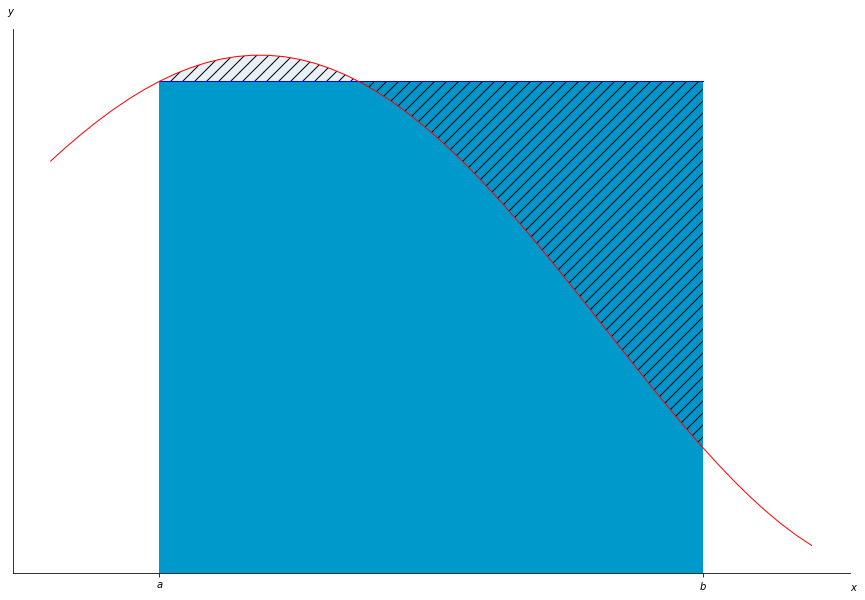

In [28]:
def q(x):
    return f(a)*x/x

graficar(a,b,f,q)

Aproximación 1.9455800375365744
Error 214.36285170620107


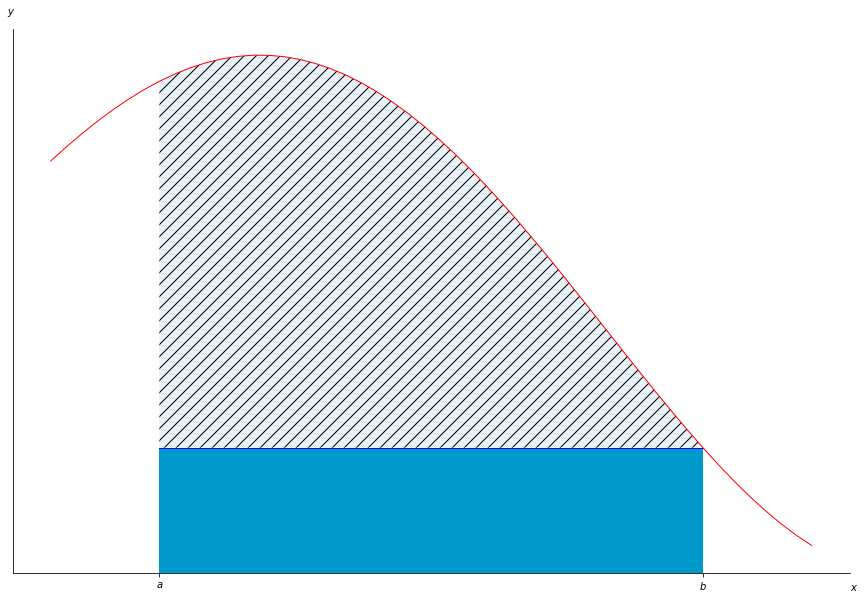

In [29]:
def RectB(a,b): # por defecto, apoyada en B
    h = b-a
    return h*f(b)
print ('Aproximación', RectB(a,b))
print ('Error', ErrorRel(RectB(a,b)))

def q(x):
    return f(b)*x/x
graficar(a,b,f,q)

### Método del Punto Medio

La versión más simple de las fórmulas de **Newton-Cotes abiertas** utiliza solamente un punto, siendo esto nuevamente una excepción a la regla de la interpolación.

In [30]:
def PuntoMedio(a,b): # por exceso, apoyada en a
    h = b-a
    return h*f(a+h/2)

print ('Aproximación', PuntoMedio(a,b))
print ('Error', ErrorRel(PuntoMedio(a,b)))

Aproximación 6.846720048359203
Error 10.66991427972467


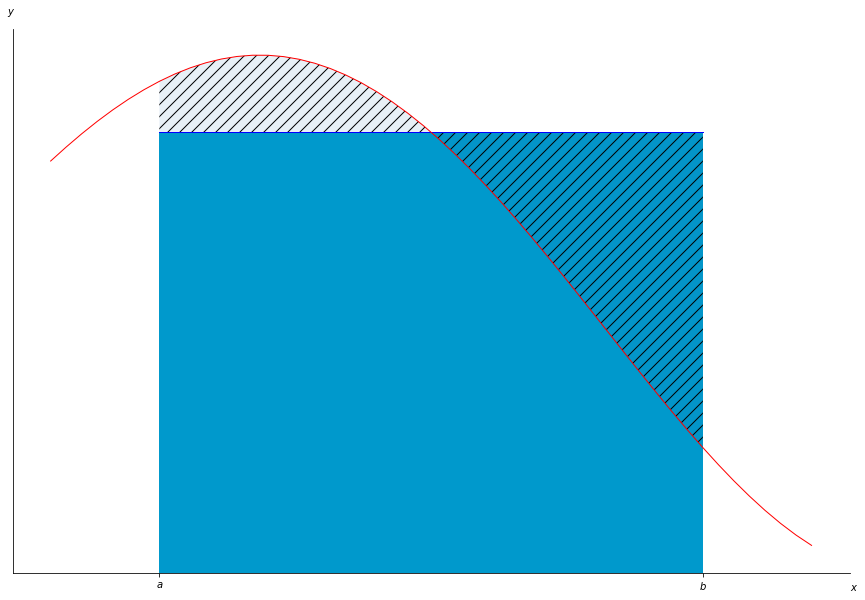

In [31]:
def q(x):
    h = b-a
    return f(a+h/2)*x/x

graficar(a,b,f,q)

### Método del trapecio

Esta fórmula de Newton-Cotes cerrada genera un polinomio interpolante lineal que pasa por $a$ y $b$:

In [32]:
def Trapecio(a,b):
    h = b-a
    Q = (h/2) * f(a) 
    Q += (h/2) * f(b)
    return Q

print ('Aproximación', Trapecio(a,b))
print ('Error', ErrorRel(Trapecio(a,b)))

Aproximación 4.79138487241965
Error 27.64954290006514


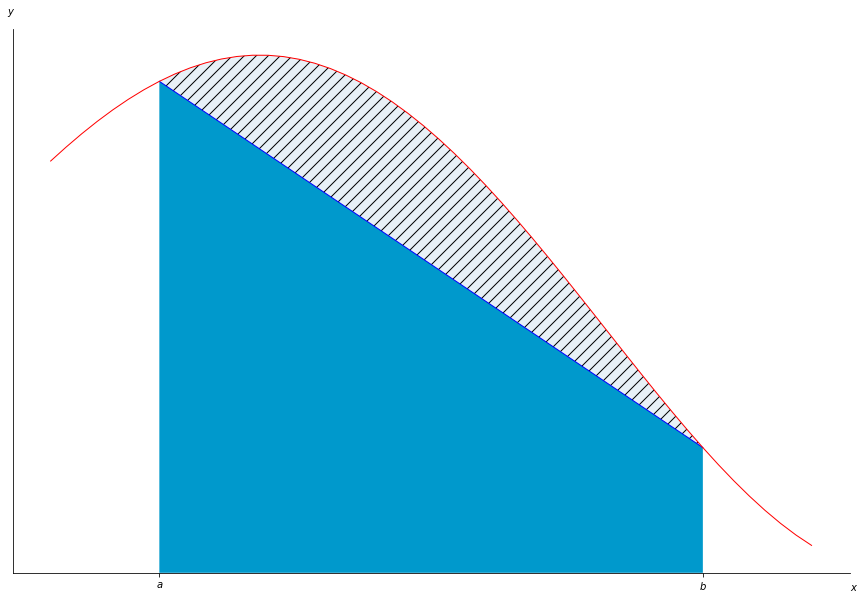

In [33]:
def q(x):
    h = b-a
    F01 = (f(b) - f(a)) / h 
    return f(a) + F01 * (x-a)

graficar(a,b,f,q)

### Método de Simpson

Esta fórmula de Newton-Cotes cerrada genera un polinomio interpolante de grado 2 que pasa por $a$, $\frac{a+b}{2}$ y $b$:

In [34]:
def Simpson(a,b):
    h = (b-a)/2
    Q  = (1/3) * h * f(a) 
    Q += (4/3) * h * f(a+h)
    Q += (1/3) * h * f(b)     
    return Q

print ('Aproximación', Simpson(a,b))
print ('Error', ErrorRel(Simpson(a,b)))

Aproximación 6.161608323046019
Error 0.7372658636797059


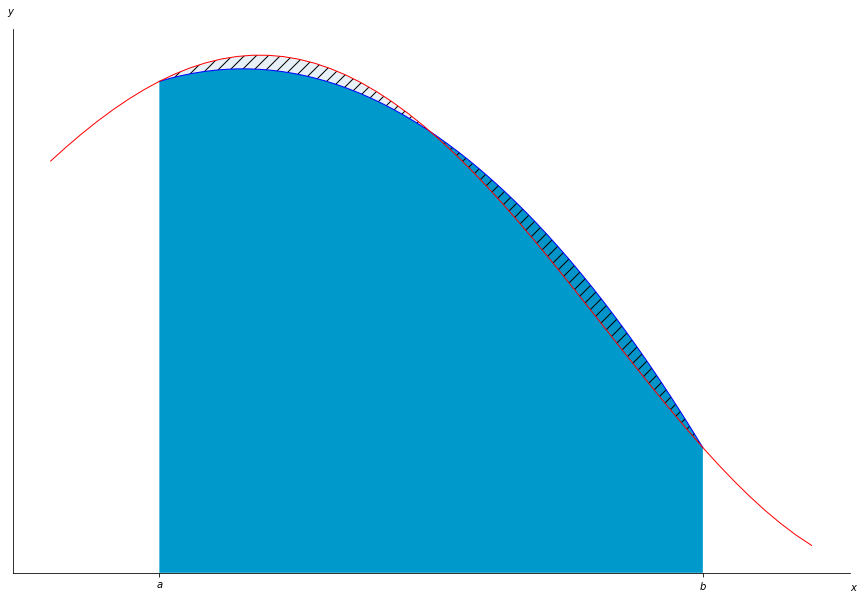

In [35]:
def q(x):
    h = (b-a)/2
    F01 = (f(a+h) - f(a)) / h 
    F12 = (f(b) - f(a+h)) / h
    F012 = (F12 - F01) / (2*h)
    return f(a) + F01 * (x-a) + F012 * (x-a) * (x-(a+h))

graficar(a,b,f,q)